# Surbhi Mayank

# TASK 2 - Prediction using unsupervised ML

## AIM : From the given dataset, predict the optimum no. of clusters and represent it visually

### Algorithm : K Means Clustering

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import sklearn.metrics as sm
import pylab
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

Defining the parameters for the visualisation

In [3]:
rcParams["figure.figsize"] = 20,10

### Initialization

In [6]:
# loading the iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# scaling the iris data
data = scale(iris.data)

# define the target
target = pd.DataFrame(iris.target)
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building the cluster

In [10]:
# Finding the optimum number of clusters for KMeans
x = df.iloc[:,[0,1,2,3]].values

# within cluster sum of squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

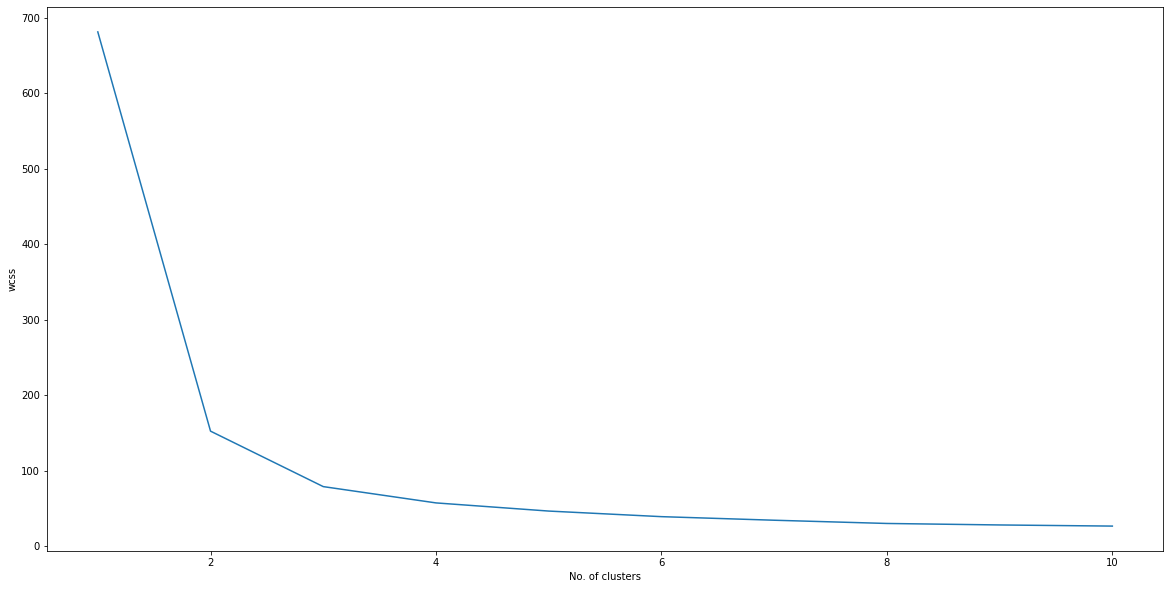

In [11]:
# plotting the result into a line graph
plt.plot(range(1,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

From this we choose n_clusters = 3

In [13]:
# building the cluster model
clustering = KMeans(n_clusters=3, random_state=0)

# applying clustering to the dataset
c_cluster = clustering.fit_predict(x)

# Visualization

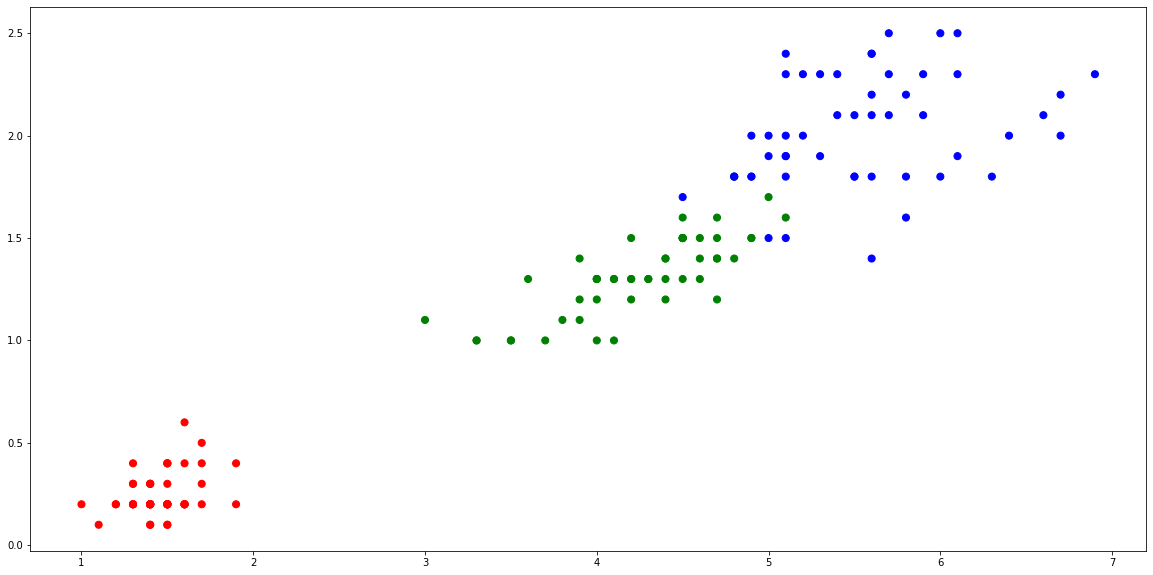

In [16]:
# scatter plot will be used for visualization
# on petal length and petal width columns of the dataset

colors = np.array(["Red","Green","Blue"])
plt.scatter(x=df["petal length (cm)"], y=df["petal width (cm)"], c=colors[iris.target], s=50)

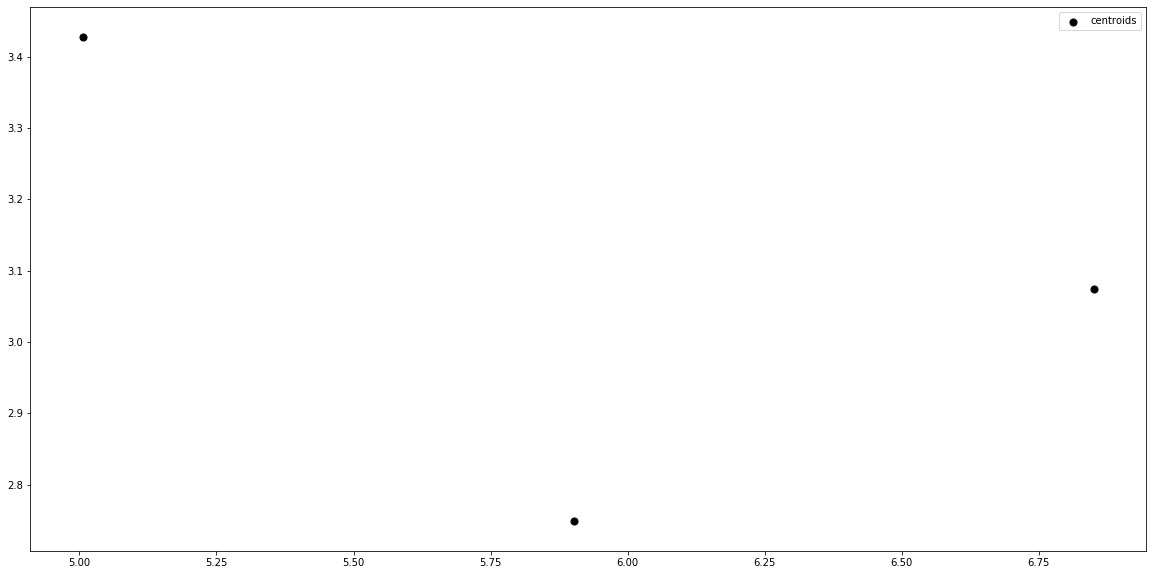

In [17]:
# plotting the centroids of the clusters
plt.scatter(clustering.cluster_centers_[:,0], clustering.cluster_centers_[:,1], s=50, c="black", label="centroids")
plt.legend()

### Hence, predicted the optimum number of clusters in the given dataset